# 3. Exploring a dictionary-based approach with Empath

Empath (see [Fast et al., 2016](https://dl.acm.org/doi/10.1145/2858036.2858535)) is a tool for analysing a given corpus of text to identify the occurrence of certain pre-defined linguistic categories (similar to what is provided by LIWC), but also provides us with a way to create our own linguistic categories based on the behaviour we might want to examine.

Empath does not come pre-installed with standard python distributions so you would need to install it on your system using the following command in your terminal:

````
pip install empath
````

In [1]:
import pandas as pd
from empath import Empath
lexicon = Empath()

In [2]:
transcript_df = pd.read_excel('data/excel/edi_2024_daniel_george.xlsx')
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance
242,242,00:18:45,George,Just.
273,273,00:20:46,Daniel,2 minutes.
368,368,00:29:49,George,We can call it Daisy Dining.


In [3]:
utterances = transcript_df['utterance'].to_list()

## Get the list of categories from Empath
Empath has a set of predefined categories that you can print by using the following command.

In [4]:
lexicon.cats.keys()

dict_keys(['help', 'office', 'dance', 'money', 'wedding', 'domestic_work', 'sleep', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 'masculine', 'prison', 'health', 'pride', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty', 'wealthy', 'tourism', 'furniture', 'school', 'magic', 'beach', 'journalism', 'morning', 'banking', 'social_media', 'exercise', 'night', 'kill', 'blue_collar_job', 'art', 'ridicule', 'play', 'computer', 'college', 'optimism', 'stealing', 'real_estate', 'home', 'divine', 'sexual', 'fear', 'irritability', 'superhero', 'business', 'driving', 'pet', 'childish', 'cooking', 'exasperation', 'religion', 'hipster', 'internet', 'surprise', 'reading', 'worship', 'leader', 'independence', 'movement', 'body', 'noise', 'eating', 'medieval', 'zest', 'confusion', 'water', 'sports', 'death', 'healing', 'legend', 'heroic

To understand what words make up a category from the list above, e.g., `help` or `office` or `positive_emotion`, use the following command.

In [5]:
print(lexicon.cats['positive_emotion'])

['friend', 'confidence', 'thrill', 'cherish', 'admiration', 'curiosity', 'better', 'understanding', 'dearly', 'bravery', 'faith', 'concern', 'empathy', 'rejoice', 'hope', 'bond', 'respect', 'unconditionally', 'honest', 'care', 'emotion', 'happy', 'assurance', 'loyalty', 'reunite', 'great', 'forgiving', 'happiness', 'enthusiasm', 'joy', 'wish', 'convince', 'thrilled', 'adoration', 'sympathize', 'comfort', 'honesty', 'reason', 'elation', 'keep', 'affection', 'family', 'kindness', 'freedom', 'willingness', 'sincerity', 'alive', 'reassurance', 'overjoyed', 'eagerness', 'closure', 'proud', 'accomplishment', 'trusting', 'glad', 'surprise', 'trust', 'excitement', 'love', 'honestly', 'feeling', 'sincere', 'genuine', 'pride', 'triumph', 'joyful', 'forgiveness', 'trustworthy', 'determination', 'optimism', 'loved', 'certainty', 'compassion', 'gratitude', 'enlighten']


To analyze a piece of text using this category, use the following function.

In [6]:
lexicon.analyze("Ohh that's happy news.", categories=["positive_emotion"], normalize=True)

{'positive_emotion': 0.25}

## Analysing a piece of text using Empath
Let's say you want to see if a text uses a higher density of `positive_emotion` words (i.e, the number of 'positive emotion' words divided by the total words in the review) than another text. For that matter, we just want to see what the `positive_emotion` scores are across all the reviews. We can use the following approach.

In [7]:
posemo_scores = []
for utterance in utterances :
    posemo = lexicon.analyze(utterance, categories=["positive_emotion"], normalize=True)
    posemo_score = posemo['positive_emotion']
    posemo_scores.append(posemo_score)


We can create a function for this approach so that we can pass this function to the dataframe.

In [8]:
def calc_posemo_score(text):
    category = 'positive_emotion'
    score = lexicon.analyze(text, categories=[category], normalize=True)
    return score[category]

transcript_df['positive_emotion'] = transcript_df['utterance'].apply(calc_posemo_score)
                                                                
# df["sentence_length2"] = df["sentences"].apply(sentence_length)
transcript_df.sample(3)                                                                               

,Unnamed: 0,timestamp,speaker,utterance,positive_emotion
15,15,00:01:16,Daniel,Yeah.,0.0
393,393,00:32:30,Daniel,And I think this one should be shorter.,0.0
107,107,00:08:59,George,It's uh.,0.0


We can then plot a histogram of the scores to see their distribution.

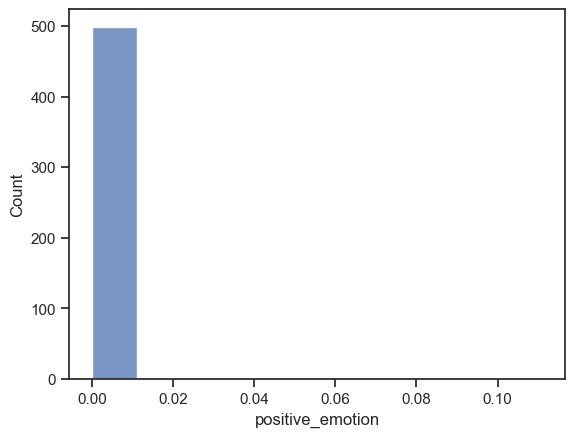

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('notebook')
sns.set_style('ticks')
plt.figure(dpi=100)

g = sns.histplot(x='positive_emotion', data=transcript_df)

You can do the same thing for the Empath category `negative_emotions`.

In [10]:
def calc_negemo_score(text):
    category = 'negative_emotion'
    score = lexicon.analyze(text, categories=[category], normalize=True)
    return score[category]

transcript_df['negative_emotion'] = transcript_df['utterance'].apply(calc_negemo_score)
                                                                
transcript_df.sample(3)                                                                               

,Unnamed: 0,timestamp,speaker,utterance,positive_emotion,negative_emotion
441,441,00:38:52,Daniel,And. Make a cool music.,0.0,0.0
412,412,00:34:36,Daniel,Where? Where? At here?,0.0,0.0
335,335,00:25:54,George,"Add the second video. No sound, yeah.",0.0,0.0


<Axes: xlabel='negative_emotion', ylabel='Count'>

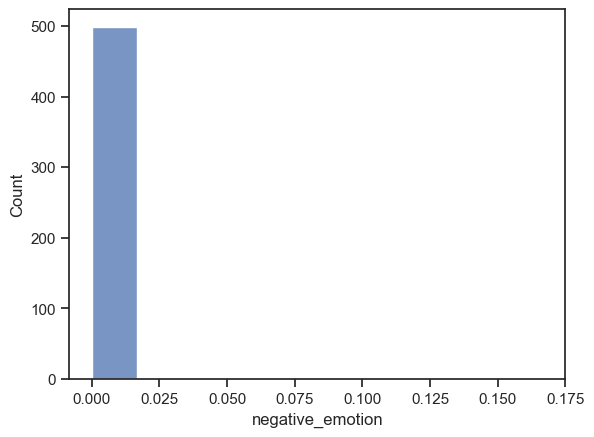

In [11]:
plt.figure(dpi=100)
sns.histplot(x='negative_emotion', data=transcript_df)


In [12]:
emotions_df = transcript_df[(transcript_df['positive_emotion'] > 0) | (transcript_df['negative_emotion'] > 0)]
emotions_df.shape

(4, 6)

Do you think the use of positive emotion-related text is more for some speakers over others? Let's see.

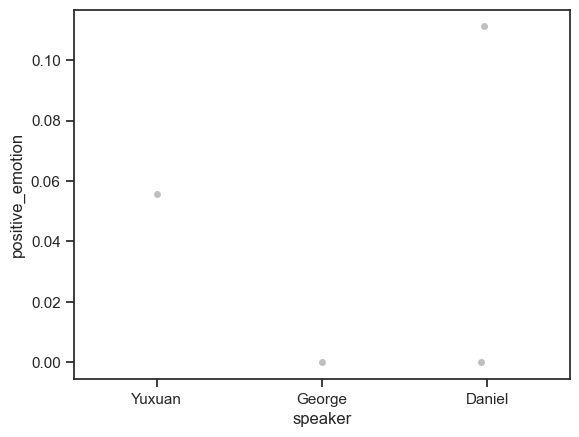

In [13]:
plt.figure(dpi=100)
g = sns.stripplot(y='positive_emotion', x='speaker', data=emotions_df, jitter=True, color='gray', alpha=0.5)

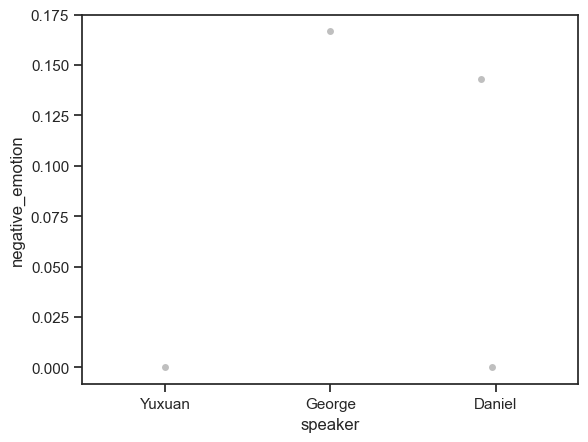

In [14]:
plt.figure(dpi=100)
g = sns.stripplot(y='negative_emotion', x='speaker', data=emotions_df, jitter=True, color='gray', alpha=0.5)


## Exercise 1
What is the explanation for the anomalies? Use techniques covered so far to identify.

**HINT:** Filter the dataframe by speaker, then the posemo & negemo scores, then examine the text.

## Exercise 2

Identify a particular behaviour you notice in your session's transcript. Can you create an Empath category for this behaviour? Analyze the transcript with your new category.
